In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('ufo_dataframe')

In [207]:
data = data.drop(columns='Unnamed: 0')
data.head()

,date/time,city,state,shape,duration,summary
0,1/31/00 22:21,Escondido,CA,Circle,8 mins,approx 22:21 saw a bright light hovering just ...
1,1/31/00 21:00,Cape Canaveral,FL,Light,1 minute,Glowing green light came up right side of movi...
2,1/30/00 23:15,San Francisco (Farallon Island),CA,Triangle,:15,Encountered large triangular object while nigh...
3,1/30/00 10:30,New Wilmington,PA,Circle,2 minutes,An airplane like object was witneesed in the s...
4,1/29/00 13:00,Beaverton,OR,Cylinder,15min,Traveling from Portland to Beaverton Saturday ...


In [208]:
from collections import defaultdict
from collections import Counter

def frecuency_words(d):
    total_words = []
    results = defaultdict(list)
    messages = d['summary'].unique().tolist()
    for message in messages:
        if type(message) == float:
            pass
        else:
            message = message.split()
            for m in message:

                if len(m)>1:
                  total_words.append(m)
                else:
                    pass
    words = Counter(total_words)
    values = list(words.values())
    words = list(words.keys())
    results['word'] = words
    results['frequency'] = values
    df = pd.DataFrame(results) 
    return df
df = frecuency_words(data)


In [209]:
df = df.sort_values(by = 'frequency', ascending=False)
most_common = df.head(n=100)

In [210]:
#Get most common words that isn't a stop word or a color
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
most_common = most_common.loc[~most_common['word'].isin(stopwords) & ~most_common['word'].isin(webcolors.CSS3_NAMES_TO_HEX)]

C:\Users\jaram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

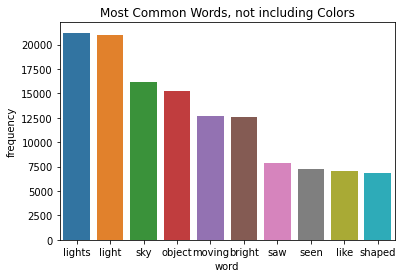

<Figure size 1080x576 with 0 Axes>

In [211]:
sns.barplot('word', 'frequency', data=most_common.head(n = 10))
plt.title('Most Common Words, not including Colors')
plt.figure(figsize = (15,8))


In [212]:
import webcolors
colors_df = df.loc[df['word'].isin(webcolors.CSS3_NAMES_TO_HEX)] #Get Dataframe with most common colors

C:\Users\jaram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most Common Colors')

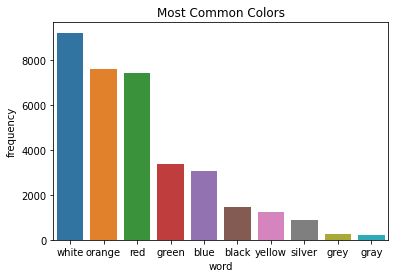

In [213]:
sns.barplot('word', 'frequency', data = colors_df.head(n=10))
plt.title('Most Common Colors')


In [214]:
#Some more deep diving into the descriptions, trying to isolate the words after 'shaped'
shape = data['summary'].str.split('shaped', expand=True)

In [215]:
shape = shape.dropna()
shape # Here we have all descriptions who try to descibe the shape of the UFO

,0,1,2
1040,A diamond,formation of black shiny diamond,objects in the middle of the day with no noise.
2072,It was cigar,with a fin,tail it was very quiet it was silver and then...
2706,11/23/00 observed a V-,and crescent-,object silently crossing the sky with dull or...
2747,"Southwest, a somewhat ""left-parenthesis""-",formation of 10-15 oval-,silvery/white objects moving from southwest t...
4488,A triangluar,craft appeared in a rectangular,"aura in Bryn Mawr, PA."
...,...,...,...
112079,3 objects in line with each other that were sq...,with triangle,lights going back and for between them. All 3...
112428,Triangle,craft with V,lights underneath
112659,White craft cigar,"traveled west to east, There were no lights o...",craft. Approximate speed was 800 to 9
112823,"Metal vertical flying, cross-",object with spoon-,glowing red top. Emitted no sounds as it flew...


In [216]:
shape['summary'] = shape[0] + shape[1] + shape[2] #Recombine for analysis
shape = shape.drop(columns=[0, 1, 2])
shape

,summary
1040,A diamond formation of black shiny diamond o...
2072,It was cigar with a fin tail it was very qui...
2706,11/23/00 observed a V- and crescent- object si...
2747,"Southwest, a somewhat ""left-parenthesis""- form..."
4488,A triangluar craft appeared in a rectangular ...
...,...
112079,3 objects in line with each other that were sq...
112428,Triangle craft with V lights underneath
112659,"White craft cigar traveled west to east, Ther..."
112823,"Metal vertical flying, cross- object with spoo..."


In [218]:
#Apply similar analysis from earlier 
shape = frecuency_words(shape)
shape = shape.loc[~shape['word'].isin(webcolors.CSS3_NAMES_TO_HEX) & ~shape['word'].isin(stopwords)]

C:\Users\jaram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most Common words describing the shape of the UFO')

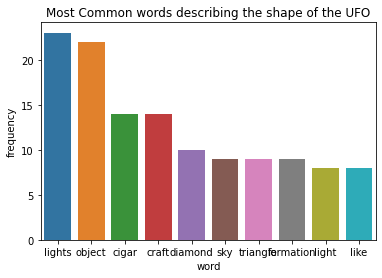

In [220]:
shape = shape.sort_values(by = 'frequency',ascending=False)
sns.barplot('word', 'frequency', data=shape.head(n=10))
plt.title('Most Common words describing the shape of the UFO')